In [66]:
import glob
import os
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)

In [6]:
base_path = os.getcwd()

In [4]:
!ls

README.md          districts_info.csv products_info.csv
Untitled.ipynb     engagement_data


In [8]:
engg_folde_path = base_path+'/'+ "engagement_data"

In [9]:
dist_path = base_path + "/"+ "districts_info.csv"
prod_path = base_path + "/" + "products_info.csv"

In [13]:
def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True, index_col=None, header=0)
    #df = reduce_mem_usage(df)
    return df

In [25]:
district_df = pd.read_csv(dist_path)
product_df = pd.read_csv(prod_path)

In [19]:
all_files = glob.glob(engg_folde_path + "/*.csv")
li = []
for filename in all_files:
    df = import_data(filename)
    district_id = filename.split("/")[11].split(".")[0]
    df["district_id"] = district_id
    if df.time.nunique() == 366:
        li.append(df)

In [23]:
df.count()

time                36577
lp_id               36577
pct_access          36577
engagement_index    21783
district_id         36577
dtype: int64

In [26]:
engagement_df = pd.concat(li, axis=0, ignore_index=True)
engagement_df = engagement_df.reset_index(drop=True)

engagement_df['district_id']=engagement_df['district_id'].astype(str)
district_df['district_id']=district_df['district_id'].astype(str)
district_df.loc[:,'district_id'] = district_df['district_id'].str.replace('\.0', '')

In [27]:
district_df

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
228,9515,New York,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[18000, 20000["
229,8103,Tennessee,Rural,"[0.2, 0.4[",NaN,"[0.18, 1[","[8000, 10000["
230,4929,Virginia,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[12000, 14000["
231,7975,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[",NaN


In [29]:
engagement_df.shape

(18612528, 5)

In [30]:
engagement_df.head(100)

,time,lp_id,pct_access,engagement_index,district_id
0,2020-01-01,29322.00,0.04,1.30,3188
1,2020-01-01,57084.00,0.04,0.43,3188
2,2020-01-01,99916.00,0.09,5.20,3188
3,2020-01-01,58235.00,0.00,nan,3188
4,2020-01-01,11585.00,0.04,1.30,3188
...,...,...,...,...,...
95,2020-01-02,76889.00,0.00,nan,3188
96,2020-01-02,97896.00,0.13,4.77,3188
97,2020-01-02,33185.00,3.04,176.50,3188
98,2020-01-02,38871.00,0.00,nan,3188


In [31]:
engagement_df.dtypes

time                 object
lp_id               float64
pct_access          float64
engagement_index    float64
district_id          object
dtype: object

In [32]:
district_df = district_df[district_df.state.notna()]
district_df = district_df[district_df.district_id.isin(engagement_df.district_id.unique())].reset_index(drop=True)
district_df.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000["
1,7177,North Carolina,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[0.18, 1[","[8000, 10000["
2,9812,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,6584,North Carolina,Rural,"[0.4, 0.6[","[0.6, 0.8[","[0.18, 1[","[8000, 10000["
4,1044,Missouri,Suburb,"[0, 0.2[","[0, 0.2[",NaN,"[10000, 12000["


In [60]:
product_df

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),sector_Corporate,sector_HigherEd,sector_PreK-12,primary_function_main,primary_function_sub
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,0,0,1,LC,Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,0,0,1,LC,Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,0,0,1,LC,"Sites, Resources & Reference"
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,0,1,1,LC,Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,0,0,1,LC,Digital Learning Platforms
...,...,...,...,...,...,...,...,...,...,...
364,24396,https://www.mathsisfun.com/,Math is Fun,Mathsisfun.com,PreK-12,0,0,1,LC,"Sites, Resources & Reference"
365,22241,https://www.history.com/,History.com,"A&E Television Networks, LLC",PreK-12; Higher Ed,0,1,1,LC,"Sites, Resources & Reference"
366,93376,https://www.cultofpedagogy.com/,Cult of Pedagogy,Cult of Pedagogy,PreK-12,0,0,1,CM,Teacher Resources
367,32555,http://www.innersloth.com/gameAmongUs.php,Among Us,InnerSloth,PreK-12; Higher Ed,0,1,1,LC,"Sites, Resources & Reference"


In [38]:
temp_sectors = product_df['Sector(s)'].str.get_dummies(sep="; ")
temp_sectors.columns = [f"sector_{re.sub(' ', '', c)}" for c in temp_sectors.columns]
product_df = product_df.join(temp_sectors)

In [39]:
product_df['primary_function_main'] = product_df['Primary Essential Function'].apply(lambda x: x.split(' - ')[0] if x == x else x)
product_df['primary_function_sub'] = product_df['Primary Essential Function'].apply(lambda x: x.split(' - ')[1] if x == x else x)

# Synchronize similar values
product_df['primary_function_sub'] = product_df['primary_function_sub'].replace({'Sites, Resources & References' : 'Sites, Resources & Reference'})
product_df.drop("Primary Essential Function", axis=1, inplace=True)
product_df = product_df[product_df['LP ID'].isin(engagement_df.lp_id.unique())].reset_index(drop=True)



In [40]:
product_df

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),sector_Corporate,sector_HigherEd,sector_PreK-12,primary_function_main,primary_function_sub
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,0,0,1,LC,Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,0,0,1,LC,Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,0,0,1,LC,"Sites, Resources & Reference"
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,0,1,1,LC,Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,0,0,1,LC,Digital Learning Platforms
...,...,...,...,...,...,...,...,...,...,...
364,24396,https://www.mathsisfun.com/,Math is Fun,Mathsisfun.com,PreK-12,0,0,1,LC,"Sites, Resources & Reference"
365,22241,https://www.history.com/,History.com,"A&E Television Networks, LLC",PreK-12; Higher Ed,0,1,1,LC,"Sites, Resources & Reference"
366,93376,https://www.cultofpedagogy.com/,Cult of Pedagogy,Cult of Pedagogy,PreK-12,0,0,1,CM,Teacher Resources
367,32555,http://www.innersloth.com/gameAmongUs.php,Among Us,InnerSloth,PreK-12; Higher Ed,0,1,1,LC,"Sites, Resources & Reference"


In [41]:
full_table = pd.merge(engagement_df,product_df, "inner", left_on='lp_id', right_on='LP ID')
full_table = pd.merge(full_table,district_df, "inner", on='district_id')
full_table = full_table[full_table.engagement_index.notna()]
full_table.dropna(subset = ["state"], inplace=True)

In [44]:
full_table.head()

,time,lp_id,pct_access,engagement_index,district_id,LP ID,URL,Product Name,Provider/Company Name,Sector(s),sector_Corporate,sector_HigherEd,sector_PreK-12,primary_function_main,primary_function_sub,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,2020-01-02,29322.00,0.34,6.85,7305,29322,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,0,1,1,LC,Digital Learning Platforms,Massachusetts,Suburb,"[0, 0.2[",NaN,"[0.18, 1[","[14000, 16000["
1,2020-01-03,29322.00,0.07,4.11,7305,29322,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,0,1,1,LC,Digital Learning Platforms,Massachusetts,Suburb,"[0, 0.2[",NaN,"[0.18, 1[","[14000, 16000["
2,2020-01-05,29322.00,0.07,0.68,7305,29322,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,0,1,1,LC,Digital Learning Platforms,Massachusetts,Suburb,"[0, 0.2[",NaN,"[0.18, 1[","[14000, 16000["
3,2020-01-06,29322.00,0.21,10.27,7305,29322,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,0,1,1,LC,Digital Learning Platforms,Massachusetts,Suburb,"[0, 0.2[",NaN,"[0.18, 1[","[14000, 16000["
4,2020-01-07,29322.00,0.34,7.53,7305,29322,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,0,1,1,LC,Digital Learning Platforms,Massachusetts,Suburb,"[0, 0.2[",NaN,"[0.18, 1[","[14000, 16000["


In [43]:
full_table.shape

(6248301, 21)

In [45]:
# datetime 
full_table["time"] = pd.to_datetime(full_table.time)
full_table["week"] = full_table.time.dt.dayofweek 
full_table["holiday"] = full_table.week.apply(lambda x: 1 if x in [5, 6] else 0)
d = pd.date_range(start="2020-01-01", end="2020-01-19")
full_table["is_pandemic"] = full_table.time.apply(lambda x: 0 if x in d else 1)
full_table.drop("week", axis=1, inplace=True)

In [46]:
full_table.head()

,time,lp_id,pct_access,engagement_index,district_id,LP ID,URL,Product Name,Provider/Company Name,Sector(s),sector_Corporate,sector_HigherEd,sector_PreK-12,primary_function_main,primary_function_sub,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw,holiday,is_pandemic
0,2020-01-02,29322.00,0.34,6.85,7305,29322,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,0,1,1,LC,Digital Learning Platforms,Massachusetts,Suburb,"[0, 0.2[",NaN,"[0.18, 1[","[14000, 16000[",0,0
1,2020-01-03,29322.00,0.07,4.11,7305,29322,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,0,1,1,LC,Digital Learning Platforms,Massachusetts,Suburb,"[0, 0.2[",NaN,"[0.18, 1[","[14000, 16000[",0,0
2,2020-01-05,29322.00,0.07,0.68,7305,29322,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,0,1,1,LC,Digital Learning Platforms,Massachusetts,Suburb,"[0, 0.2[",NaN,"[0.18, 1[","[14000, 16000[",1,0
3,2020-01-06,29322.00,0.21,10.27,7305,29322,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,0,1,1,LC,Digital Learning Platforms,Massachusetts,Suburb,"[0, 0.2[",NaN,"[0.18, 1[","[14000, 16000[",0,0
4,2020-01-07,29322.00,0.34,7.53,7305,29322,http://www.khanacademy.org,Khan Academy,Khan Academy,PreK-12; Higher Ed,0,1,1,LC,Digital Learning Platforms,Massachusetts,Suburb,"[0, 0.2[",NaN,"[0.18, 1[","[14000, 16000[",0,0


In [65]:
full_table.corr()

,lp_id,pct_access,engagement_index,LP ID,sector_Corporate,sector_HigherEd,sector_PreK-12,holiday,is_pandemic
lp_id,1.00,0.06,0.05,1.00,0.01,-0.01,-0.01,0.00,0.00
pct_access,0.06,1.00,0.73,0.06,0.12,0.07,0.04,-0.08,-0.01
engagement_index,0.05,0.73,1.00,0.05,0.10,0.07,0.02,-0.04,0.01
LP ID,1.00,0.06,0.05,1.00,0.01,-0.01,-0.01,0.00,0.00
sector_Corporate,0.01,0.12,0.10,0.01,1.00,0.67,0.10,0.03,0.00
sector_HigherEd,-0.01,0.07,0.07,-0.01,0.67,1.00,0.23,0.03,-0.00
sector_PreK-12,-0.01,0.04,0.02,-0.01,0.10,0.23,1.00,0.00,0.00
holiday,0.00,-0.08,-0.04,0.00,0.03,0.03,0.00,1.00,0.01
is_pandemic,0.00,-0.01,0.01,0.00,0.00,-0.00,0.00,0.01,1.00


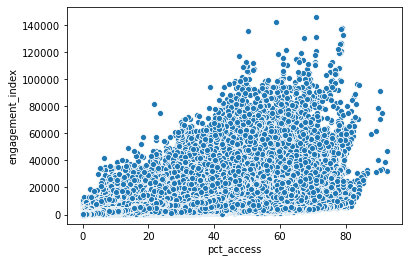

In [69]:
sns.scatterplot(full_table['pct_access'], full_table["engagement_index"])
plt.xlabel('pct_access')
plt.ylabel('engagement_index')
plt.show()

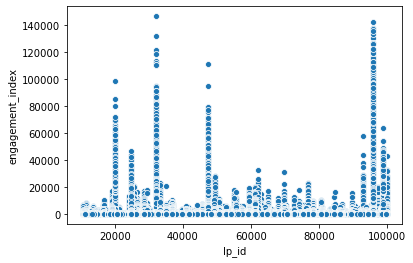

In [71]:
sns.scatterplot(full_table['lp_id'], full_table["engagement_index"])
plt.xlabel('lp_id')
plt.ylabel('engagement_index')
plt.show()

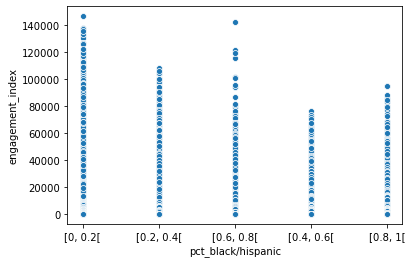

In [72]:
sns.scatterplot(full_table['pct_black/hispanic'], full_table["engagement_index"])
plt.xlabel('pct_black/hispanic')
plt.ylabel('engagement_index')
plt.show()

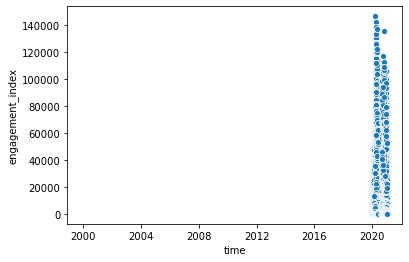

In [75]:
full_table_2020 = full_table[full_table.time > '2020-01-01']
sns.scatterplot(full_table_2020['time'], full_table_2020["engagement_index"])
plt.xlabel('time')
plt.ylabel('engagement_index')
plt.show()

In [47]:
full_table[full_table.is_pandemic == 0].groupby('holiday')['pct_access'].mean()

holiday
0   1.43
1   0.24
Name: pct_access, dtype: float64

In [48]:
full_table[full_table.is_pandemic != 0].groupby('holiday')['pct_access'].mean()

holiday
0   1.19
1   0.30
Name: pct_access, dtype: float64

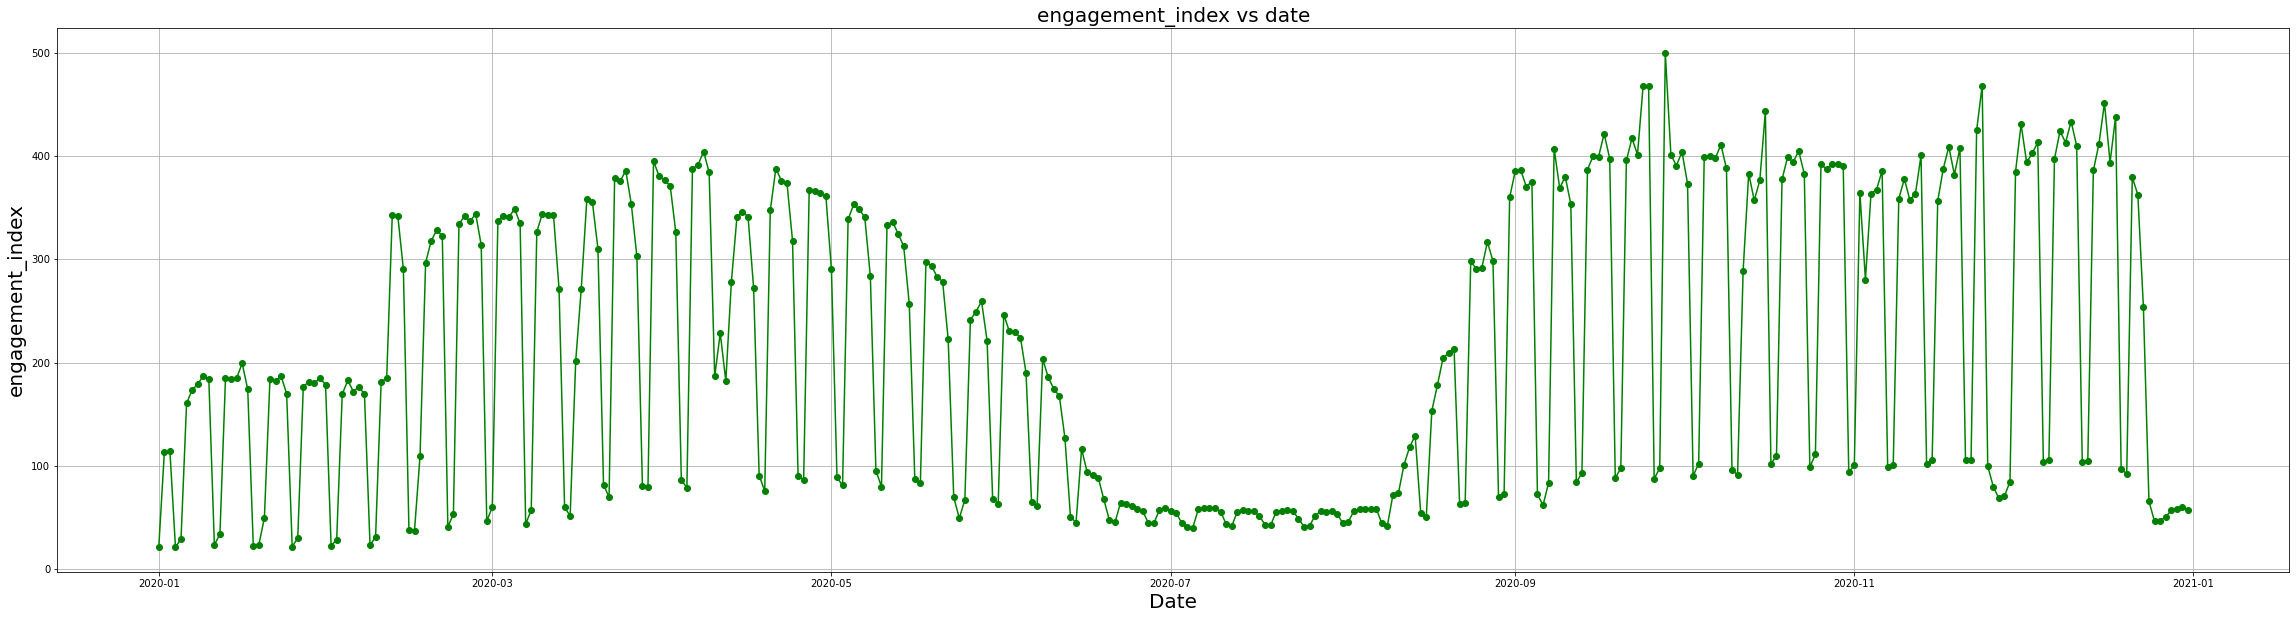

In [94]:
full_table_day_wise_engagement = full_table.groupby('time')['engagement_index'].mean()
plt.figure(figsize=(40,10))
plt.plot(full_table_day_wise_engagement,color='green', marker='o')
plt.title('engagement_index vs date', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('engagement_index', fontsize=20)
plt.grid(True)
plt.show()

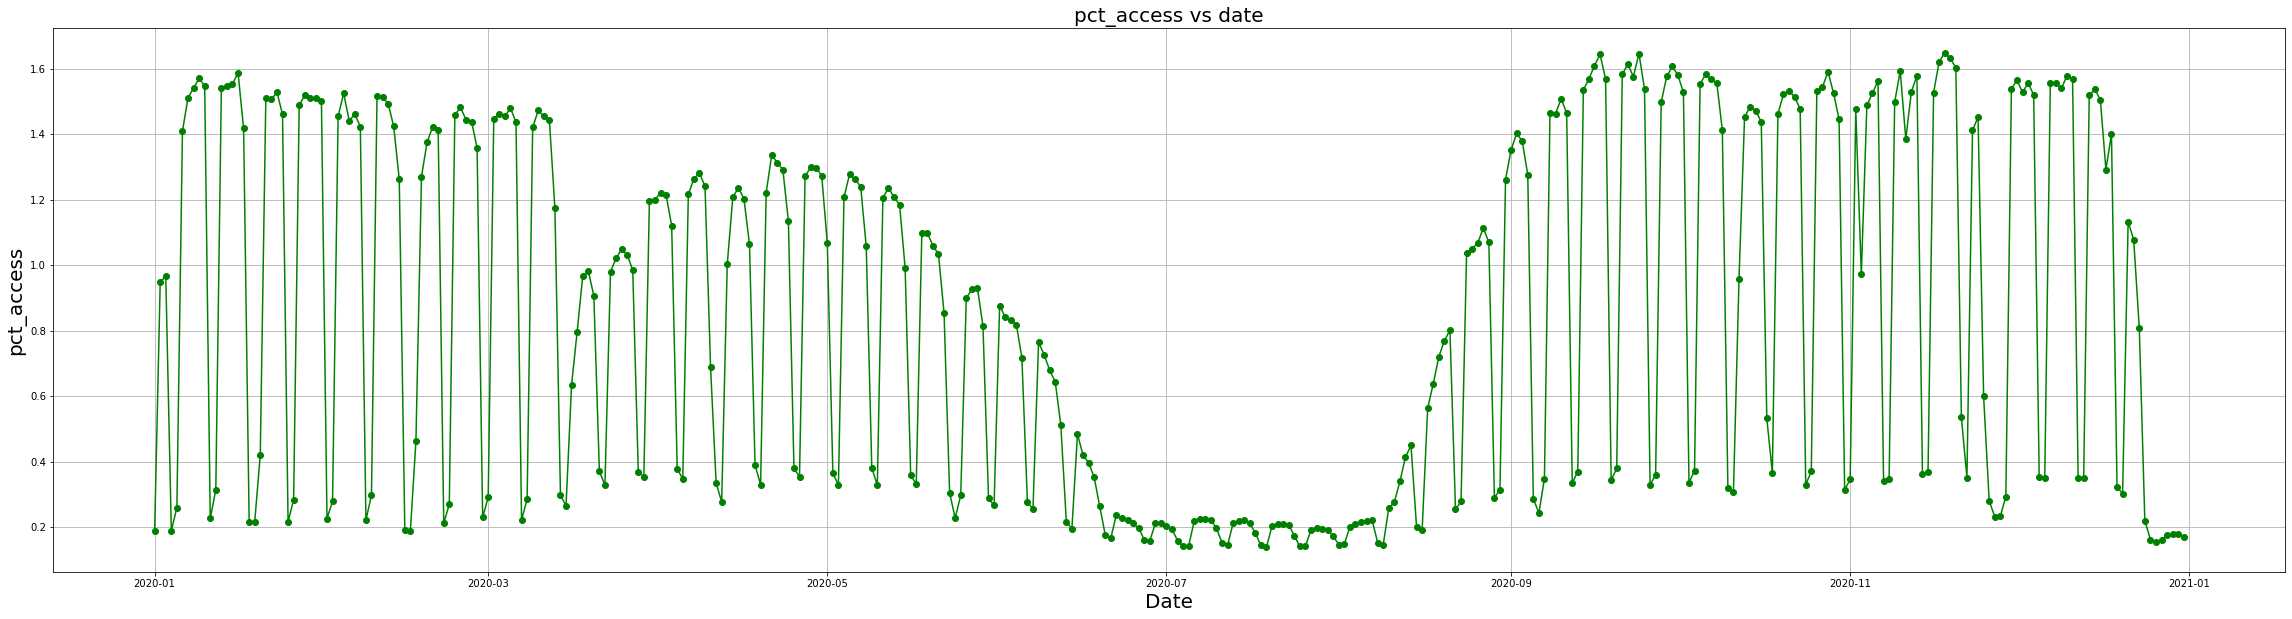

In [99]:
full_table_day_wise_access = full_table.groupby('time')['pct_access'].mean()
plt.figure(figsize=(40,10))
plt.plot(full_table_day_wise_access,color='green', marker='o')
plt.title('pct_access vs date', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('pct_access', fontsize=20)
plt.grid(True)
plt.show()

In [49]:
full_table[full_table.is_pandemic == 0].groupby('holiday')['engagement_index'].mean()

holiday
0   170.25
1    25.87
Name: engagement_index, dtype: float64

In [50]:
full_table[full_table.is_pandemic == 1].groupby('holiday')['engagement_index'].mean()

holiday
0   303.65
1    78.79
Name: engagement_index, dtype: float64

In [52]:
most_popular_products = full_table.groupby('Product Name')['engagement_index'].mean()

In [53]:
most_popular_products.reset_index().sort_values(by = 'engagement_index', ascending=False, ignore_index=True).head(10)

,Product Name,engagement_index
0,Google Docs,11182.12
1,Google Classroom,5505.89
2,YouTube,3098.31
3,Canvas,2945.80
4,Meet,1644.59
5,Kahoot!,1416.74
6,Schoology,1409.14
7,Google Drive,883.80
8,Google Forms,845.50
9,Google Sheets,550.22


In [54]:
most_engaged_states = full_table.groupby('state')['engagement_index'].mean()
most_engaged_states.reset_index().sort_values(by = 'engagement_index', ascending=False, ignore_index=True).head(10)

,state,engagement_index
0,Arizona,854.62
1,New York,550.92
2,New Hampshire,410.83
3,Connecticut,346.46
4,Indiana,313.01
5,Illinois,308.44
6,Massachusetts,301.22
7,Ohio,242.38
8,New Jersey,222.34
9,District Of Columbia,208.64


In [55]:

most_engaged_states = full_table.groupby('locale')['engagement_index'].mean()
most_engaged_states.reset_index().sort_values(by = 'engagement_index', ascending=False, ignore_index=True).head(10)

,locale,engagement_index
0,Rural,380.25
1,Suburb,250.18
2,Town,245.18
3,City,156.17


In [56]:
most_engaged_states = full_table.groupby(['state', 'locale'])['engagement_index'].mean()
most_engaged_states.reset_index().sort_values(by = 'engagement_index', ascending=False, ignore_index=True).head(10)

,state,locale,engagement_index
0,Arizona,City,854.62
1,Ohio,Town,638.59
2,California,Rural,604.37
3,New York,Rural,550.92
4,Connecticut,Rural,450.38
5,New Hampshire,Rural,410.83
6,Indiana,Rural,381.64
7,Illinois,Rural,379.74
8,Massachusetts,Rural,365.58
9,Indiana,Town,360.34


In [57]:
full_table.groupby('pct_black/hispanic')['pct_access'].mean()


pct_black/hispanic
[0, 0.2[     1.10
[0.2, 0.4[   0.95
[0.4, 0.6[   0.58
[0.6, 0.8[   0.78
[0.8, 1[     1.27
Name: pct_access, dtype: float64

In [58]:
full_table.groupby('pct_black/hispanic')['engagement_index'].mean()

pct_black/hispanic
[0, 0.2[     276.28
[0.2, 0.4[   243.48
[0.4, 0.6[   151.23
[0.6, 0.8[   172.19
[0.8, 1[     260.12
Name: engagement_index, dtype: float64

In [59]:
product_df['Provider/Company Name'].value_counts().reset_index().head(10)

,index,Provider/Company Name
0,Google LLC,29
1,Microsoft,6
2,Houghton Mifflin Harcourt,6
3,Learning A-Z,4
4,IXL Learning,4
5,PBS,3
6,Savvas Learning Company | Formerly Pearson K12...,3
7,Adobe Inc.,3
8,"Autodesk, Inc",3
9,The College Board,3
